In [2]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris=datasets.load_iris()
features=iris.data
target=iris.target
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
iris

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
target_names=iris.target_names
labels=target_names[target]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [21]:
a = [[1,2,3],[4,5,6]]
b = [[7,8,9],[4,4,4]]
c = [1,2,3]
d = [4,5,6]
print(np.c_[a,b])
print(np.r_[c,d])

[[1 2 3 7 8 9]
 [4 5 6 4 4 4]]
[1 2 3 4 5 6]


In [22]:
setosa_petal_length=features[labels=='setosa',2]
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]
setosa

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [24]:
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]

In [25]:
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

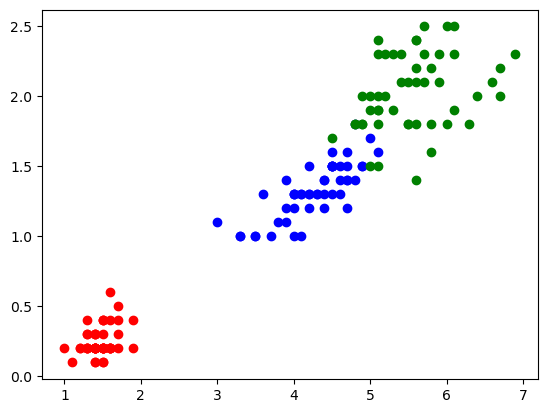

In [26]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [35]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [36]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [37]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

In [38]:
yy

array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
       ...,
       [ 3.44,  3.44,  3.44, ...,  3.44,  3.44,  3.44],
       [ 3.46,  3.46,  3.46, ...,  3.46,  3.46,  3.46],
       [ 3.48,  3.48,  3.48, ...,  3.48,  3.48,  3.48]])

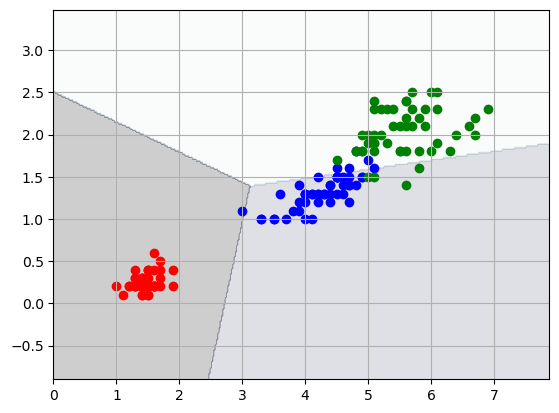

In [39]:
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()

# 重要參數
## C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
## gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
## kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等
https://scikit-learn.org/stable/modules/svm.html<br>
svm.LinearSVC (Linear Support Vector Classification)與svm.SVC(kernel=’linear’)差異<br>
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

In [1]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

In [43]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
xx

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

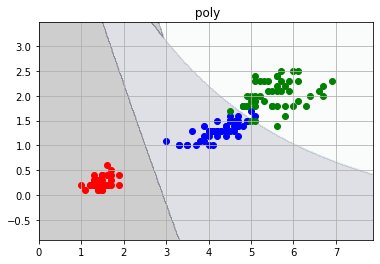

In [48]:
clf=svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plot(clf,'poly')

## 換特徵

In [49]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

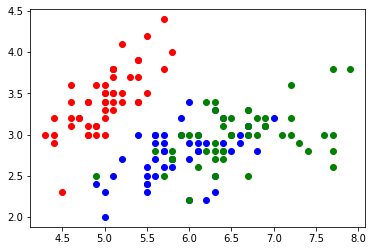

In [50]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [51]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

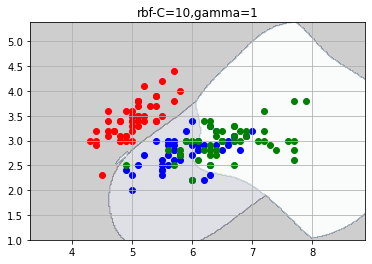

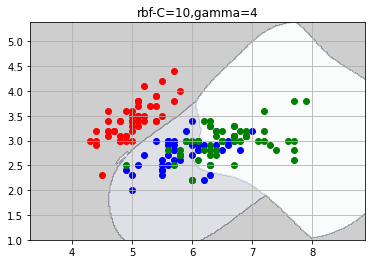

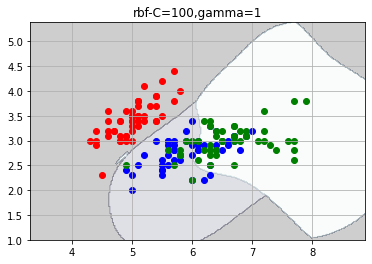

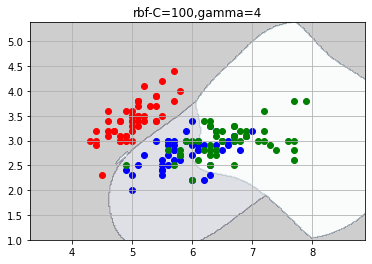

In [71]:
C = [10,100]
gamma = [1,4]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C=100,gamma=1)
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))

# 整體流程

## Step1. 下載資料

In [4]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [6]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

In [7]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Step5. 準確度分析

In [8]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777
